In [3]:
%matplotlib inline


# Realtime Functionality
This sample script shows how to use Tropycal to retrieve and plot real time tropical cyclones and potential formation. As this script was written on 24 September 2022, the data below is valid for the time this script was written.


In [4]:
from tropycal import realtime

## Reading In Realtime Dataset

Let's start with the Realtime dataset by loading it into memory. By default, this reads in Best Track data from the National Hurricane Center (NHC) and filters for all active tropical cyclones and invests over the last 18 hours.

The default is to not include global storms in the Joint Typhoon Warning Center (JTWC)'s area of responsibility. To read in invests and storms within JTWC's domain, add a ``jtwc=True`` argument, followed by a ``jtwc_source`` argument which can be either "jtwc", "noaa", or "ucar". Read through the documentation to see the limits and pros/cons of each method.

To keep this demonstration simple, we'll solely focus on the North Atlantic basin.



In [5]:
realtime_obj = realtime.Realtime()

--> Starting to read in current storm data
--> Completed reading in current storm data (5.54 seconds)


## View Current Activity

To quickly view the content of the Realtime object, we can simply print it:



In [6]:
realtime_obj

<tropycal.realtime.Realtime>
Dataset Summary:
    Numbers of active storms: 5
    Time Updated: 1620 UTC 11 September 2024

Active Storms:
    AL062024
    AL072024

Active Invests:
    AL922024
    AL942024
    EP932024

Alternatively, we can also list all active storms, along with an optional filter by basin.



In [7]:
realtime_obj.list_active_storms(basin='north_atlantic')

['AL062024', 'AL072024', 'AL922024', 'AL942024']

A new functionality with Tropycal v0.4 is to plot a summary of all ongoing activity, whether globally or by basin. This function can be highly customized, with more details in the documentation.

At the time this script was written, Ian, Gaston and Hermine are active in the Atlantic Ocean, with invest 99L (30% of development) active as well.

The domain option for this plot is set to 'all' by default, plotting the full globe. This can also be a basin (e.g., 'north_atlantic', 'east_pacific'), or a custom domain, as we'll plot below.



Possible issue encountered when converting Shape #3 to GeoJSON: Shapefile format requires that polygons contain at least one exterior ring, but the Shape was entirely made up of interior holes (defined by counter-clockwise orientation in the shapefile format). The rings were still included but were encoded as GeoJSON exterior rings instead of holes.
Possible issue encountered when converting Shape #3 to GeoJSON: Shapefile format requires that polygons contain at least one exterior ring, but the Shape was entirely made up of interior holes (defined by counter-clockwise orientation in the shapefile format). The rings were still included but were encoded as GeoJSON exterior rings instead of holes.


<GeoAxes: title={'left': 'Summary & NHC 7-Day Formation Outlook', 'right': 'Valid: 20 UTC 11 Sep 2024'}>

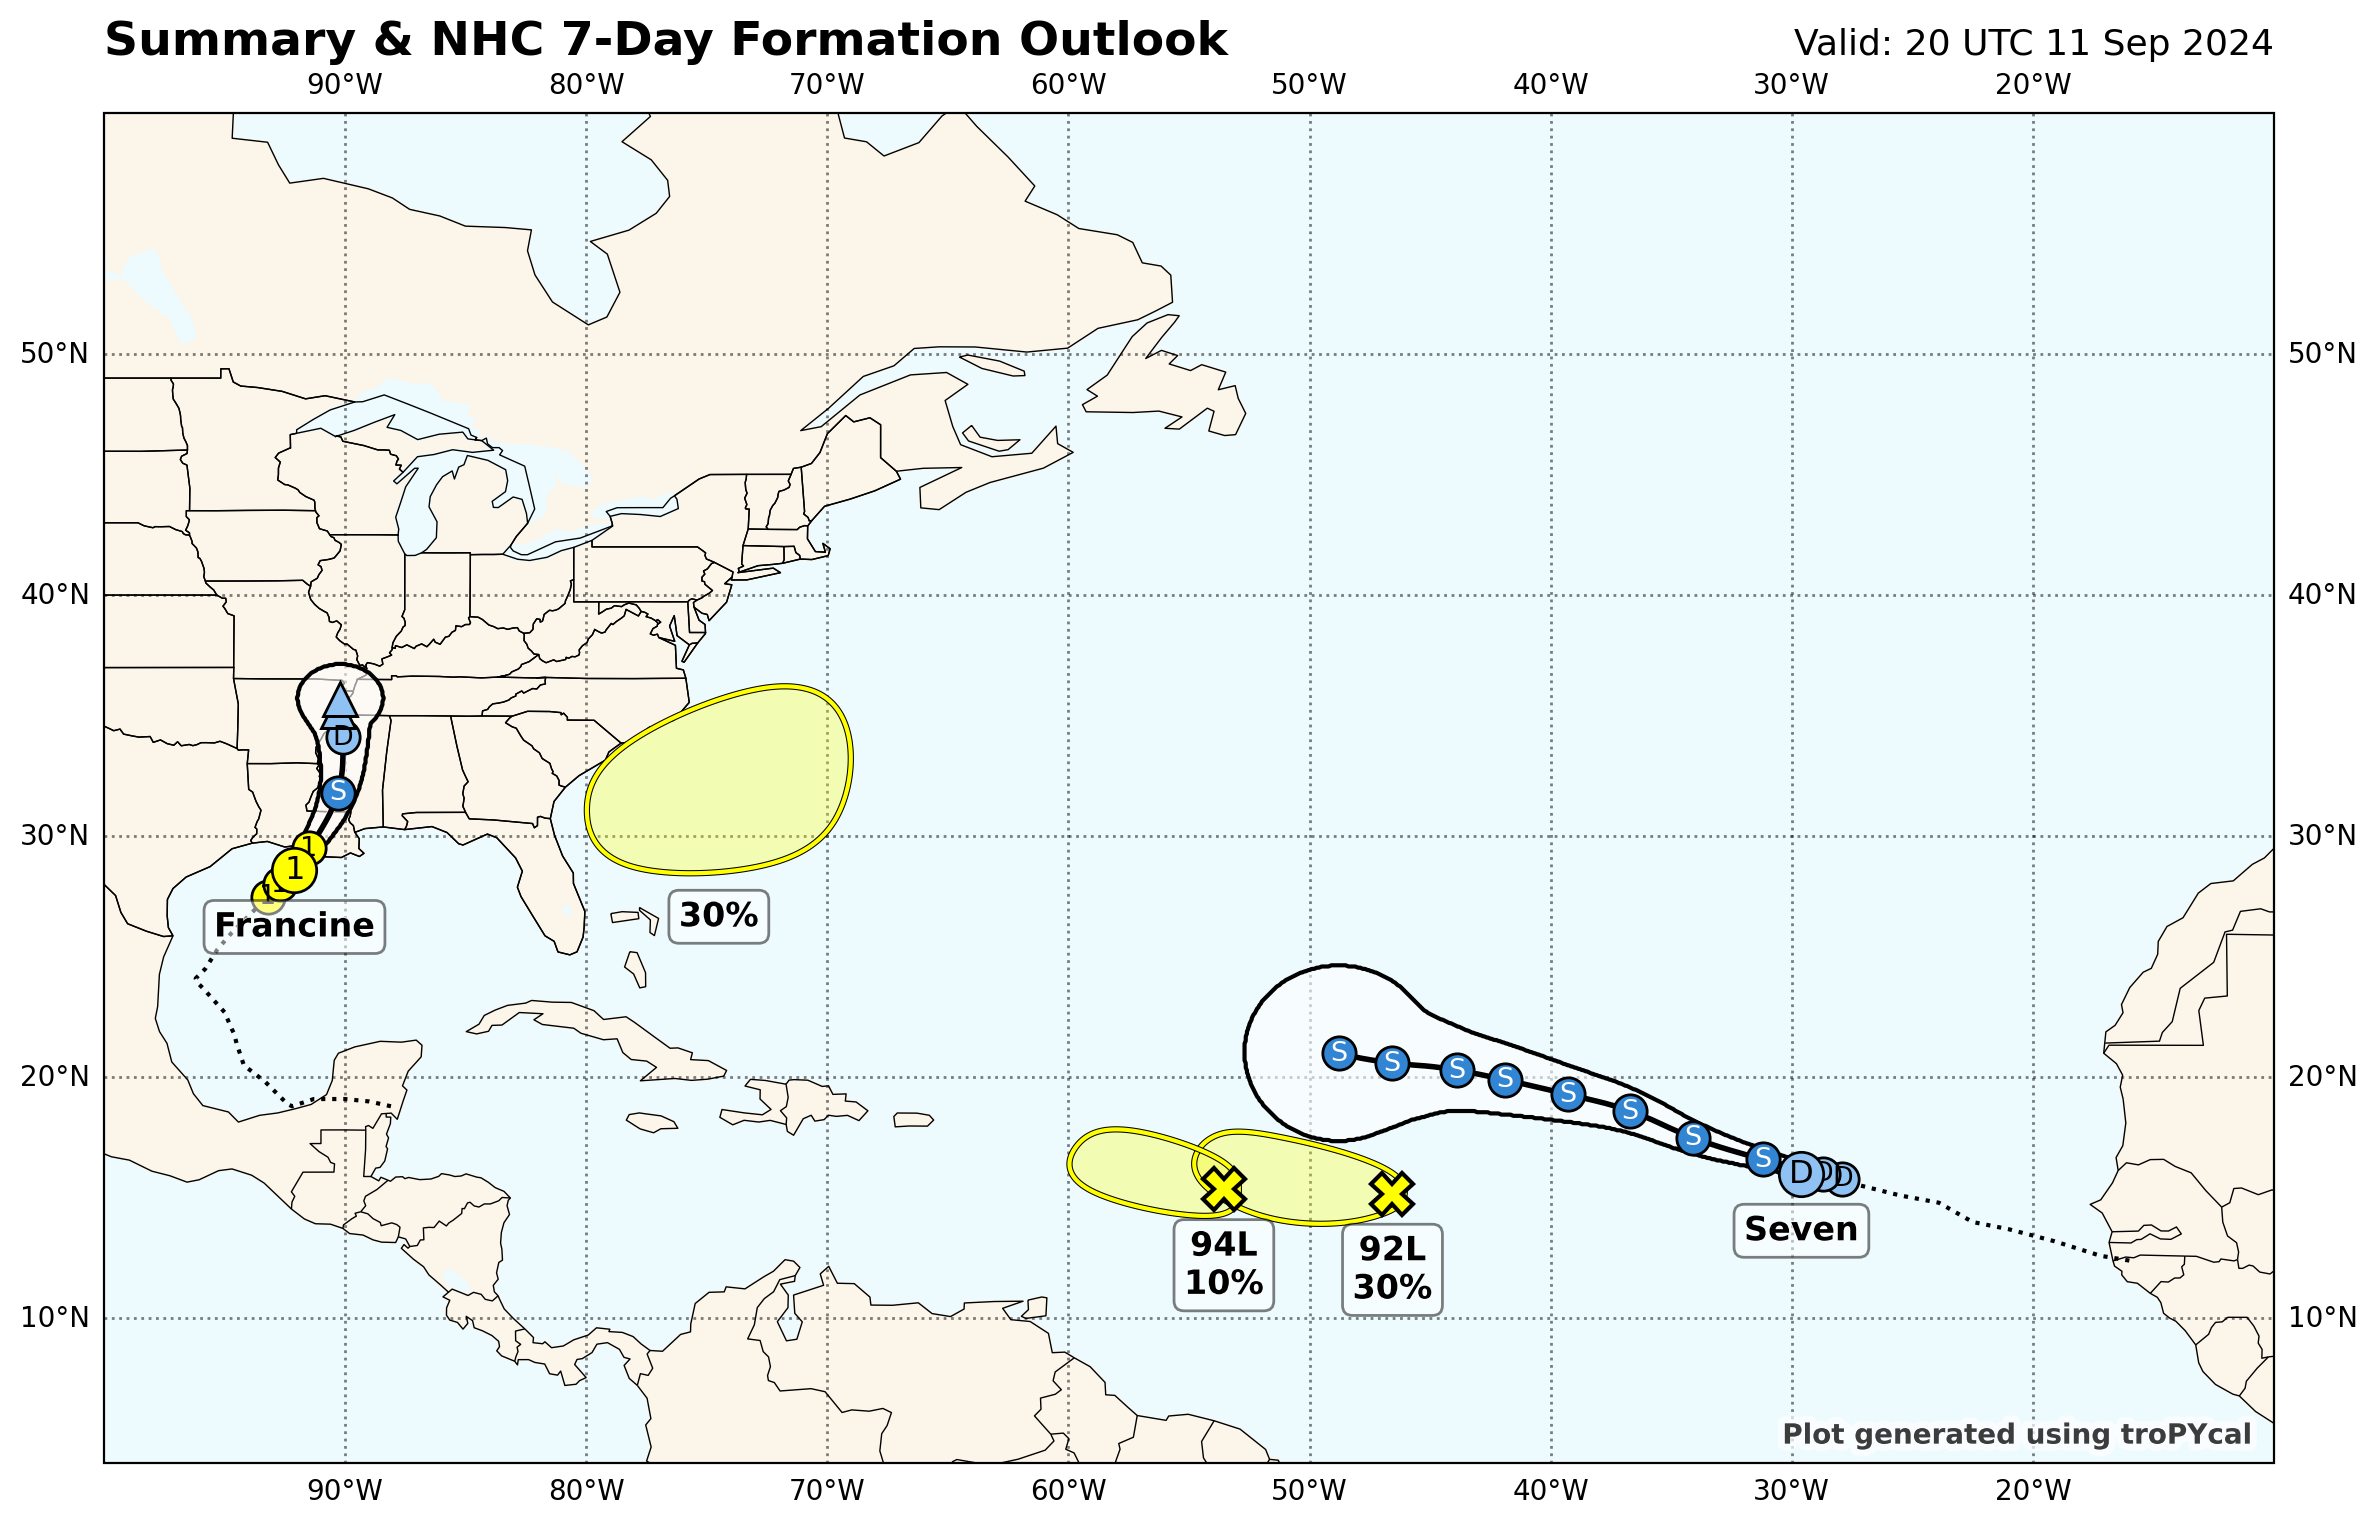

In [8]:
realtime_obj.plot_summary(domain={'w':-100,'e':-10,'s':4,'n':60})

Let's look at a few ways to customize this plot. There are four properties available to customize the plot, detailed more thoroughly in the documentation:

- ``two_prop`` - Properties to customize NHC Tropical Weather Outlook (TWO) plotting
- ``invest_prop`` - Properties to customize invest plotting
- ``storm_prop`` - Properties to customize tropical cyclone plotting
- ``cone_prop`` - Properties to customize forecast cone/track plotting

The above plot includes the NHC TWO by default. Plotting the TWO overrides any invests that have a TWO associated with them (invests that are outside of NHC's area of responsibility or don't have a TWO still appear). We can pass the ``'plot':False`` argument to any property dict, which in doing so removes that element from the summary map. Let's test this out by removing the TWO and cone of uncertainty from the plot:



<GeoAxes: title={'left': 'Summary', 'right': 'Valid: 20 UTC 11 Sep 2024'}>

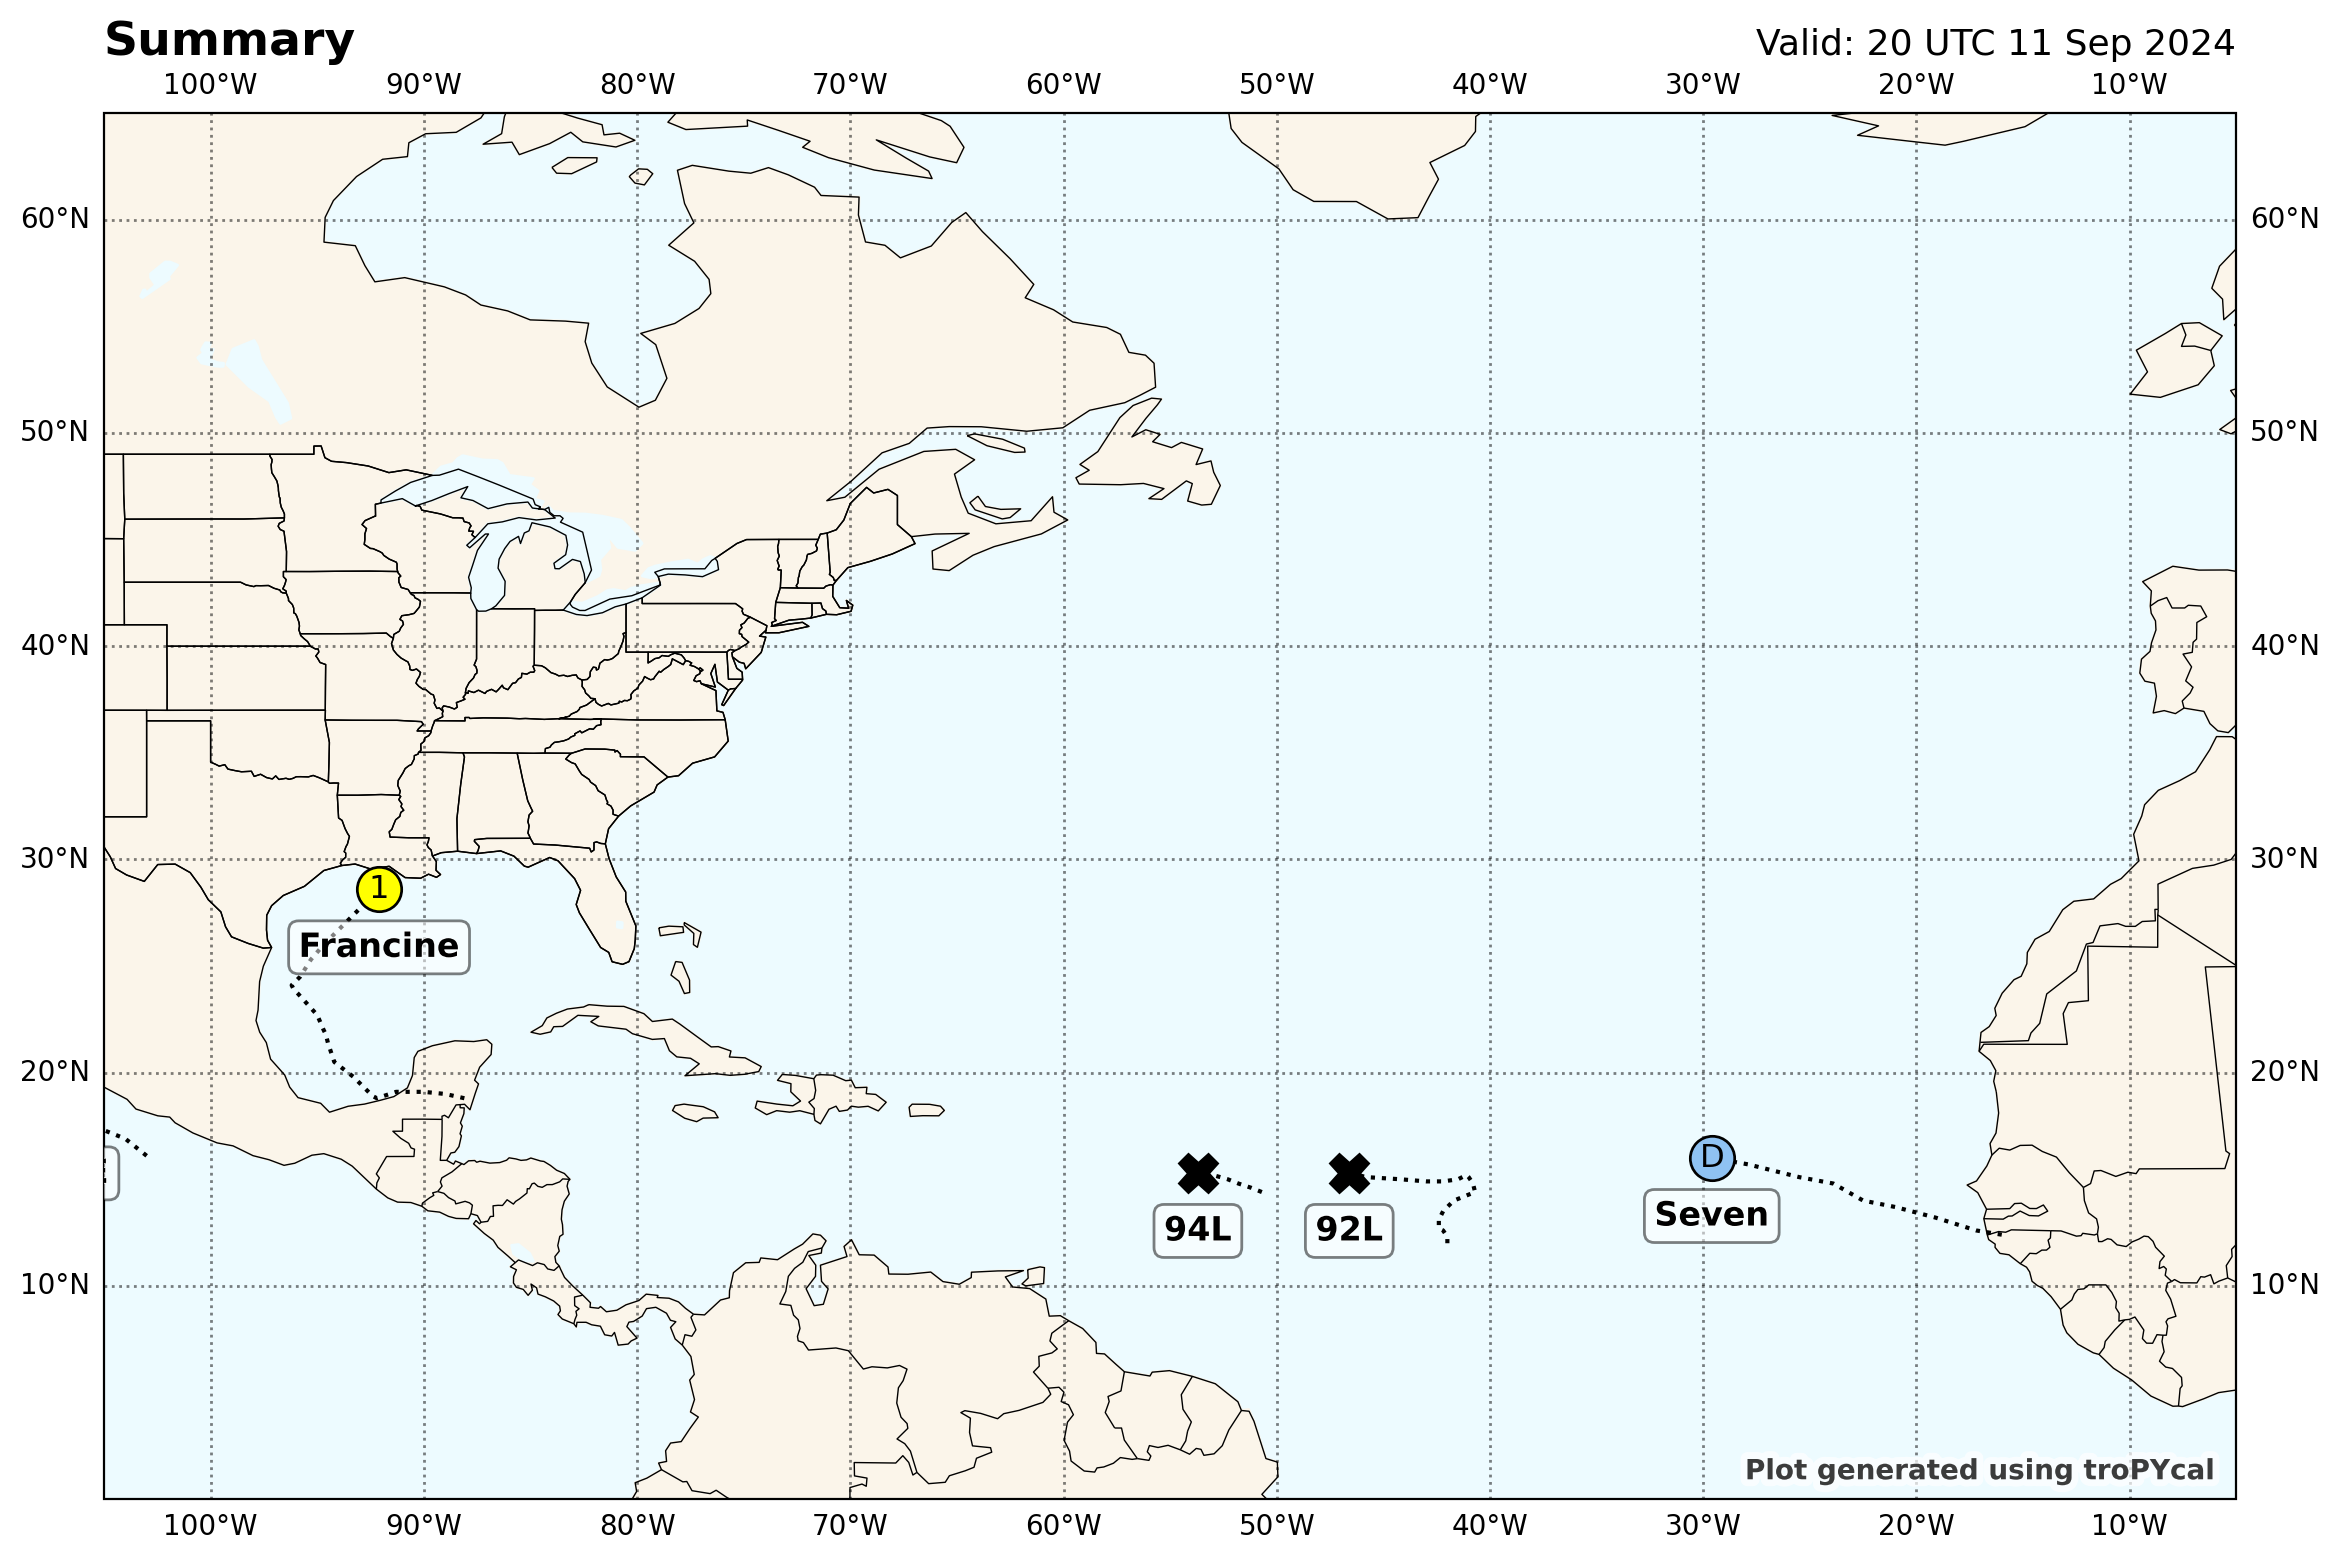

In [9]:
realtime_obj.plot_summary(domain='north_atlantic', two_prop={'plot':False}, cone_prop={'plot':False})

## Realtime Storms
To retrieve a storm from a Realtime object, simply use its ``get_storm()`` method and provide an ID as listed in ``list_active_storms()``:



In [17]:
storm = realtime_obj.get_storm('AL072024')

This now returns a RealtimeStorm object. RealtimeStorm objects inherit the same functionality as Storm objects, but have additional functions unique to realtime storms. Additionally, as these can also be valid for invests, certain functionality that is only available for tropical cyclones (e.g., NHC forecasts or discussions) is unavailable for invests.

Let's view what this RealtimeStorm object contains:



In [18]:
storm

<tropycal.realtime.RealtimeStorm>
Storm Summary:
    Maximum Wind:      30 knots
    Minimum Pressure:  1007 hPa
    Start Time:        1200 UTC 11 September 2024
    End Time:          1800 UTC 11 September 2024

Variables:
    time        (datetime) [2024-09-09 18:00:00 .... 2024-09-11 18:00:00]
    extra_obs   (int32) [0 .... 0]
    special     (str) [ .... ]
    type        (str) [DB .... TD]
    lat         (float64) [12.4 .... 16.0]
    lon         (float64) [-16.0 .... -29.6]
    vmax        (int32) [15 .... 30]
    mslp        (int32) [1010 .... 1007]
    wmo_basin   (str) [north_atlantic .... north_atlantic]

More Information:
    id:              AL072024
    operational_id:  AL072024
    name:            SEVEN
    year:            2024
    season:          2024
    basin:           north_atlantic
    source_info:     NHC Hurricane Database
    invest:          False
    source_method:   NHC's Automated Tropical Cyclone Forecasting System (ATCF)
    source_url:      https://f

A quick and easy way to check if a storm is an invest is by checking its ``invest`` attribute. This will let you know if you can use the full set of functionality available for tropical cyclones or not.



In [19]:
storm.invest

False

The next few blocks will overview functions unique to RealtimeStorm objects. We can easily retrieve the latest available forecast dictionary from NHC or JTWC, depending on what area of responsibility the storm is in.

This function also calculates the forecast Accumulated Cyclone Energy (ACE), derived by combining its observed ACE through the current time plus the forecast ACE using linearly interpolated forecast sustained wind.



In [20]:
storm.get_forecast_realtime()

{'init': datetime.datetime(2024, 9, 11, 12, 0),
 'fhr': [0, 3, 12, 24, 36, 48, 60, 72, 96, 120],
 'lat': [15.8, 16.0, 16.6, 17.5, 18.6, 19.3, 19.9, 20.3, 20.6, 21.0],
 'lon': [-27.9, -28.7, -31.2, -34.1, -36.7, -39.3, -41.9, -43.9, -46.6, -48.8],
 'vmax': [30, 30, 35, 40, 45, 45, 45, 45, 45, 45],
 'mslp': [nan, 1007, nan, nan, nan, nan, nan, nan, nan, nan],
 'type': ['TD', 'TD', 'TS', 'TS', 'TS', 'TS', 'TS', 'TS', 'TS', 'TS'],
 'windrad': [{34: [0, 0, 0, 0]},
  {34: [0, 0, 0, 0]},
  {34: [30, 0, 0, 0]},
  {34: [50, 30, 0, 30]},
  {34: [60, 40, 30, 40]},
  {34: [60, 40, 30, 40]},
  {34: [60, 40, 30, 40]},
  {34: [60, 40, 30, 40]},
  {34: [60, 40, 30, 40]},
  {34: [60, 40, 30, 40]}],
 'cumulative_ace': [0.0, 0.1, 0.4, 0.8, 1.2, 1.6, 2.0, 2.8, 3.6],
 'cumulative_ace_fhr': [0, 12, 24, 36, 48, 60, 72, 96, 120]}

We can also plot it using the ``plot_forecast_realtime()`` method:



<GeoAxes: title={'left': 'Tropical Depression SEVEN', 'right': 'Current Intensity: 35 mph • 1007 hPa\nNHC Issued: 1500 UTC 11 Sep 2024'}>

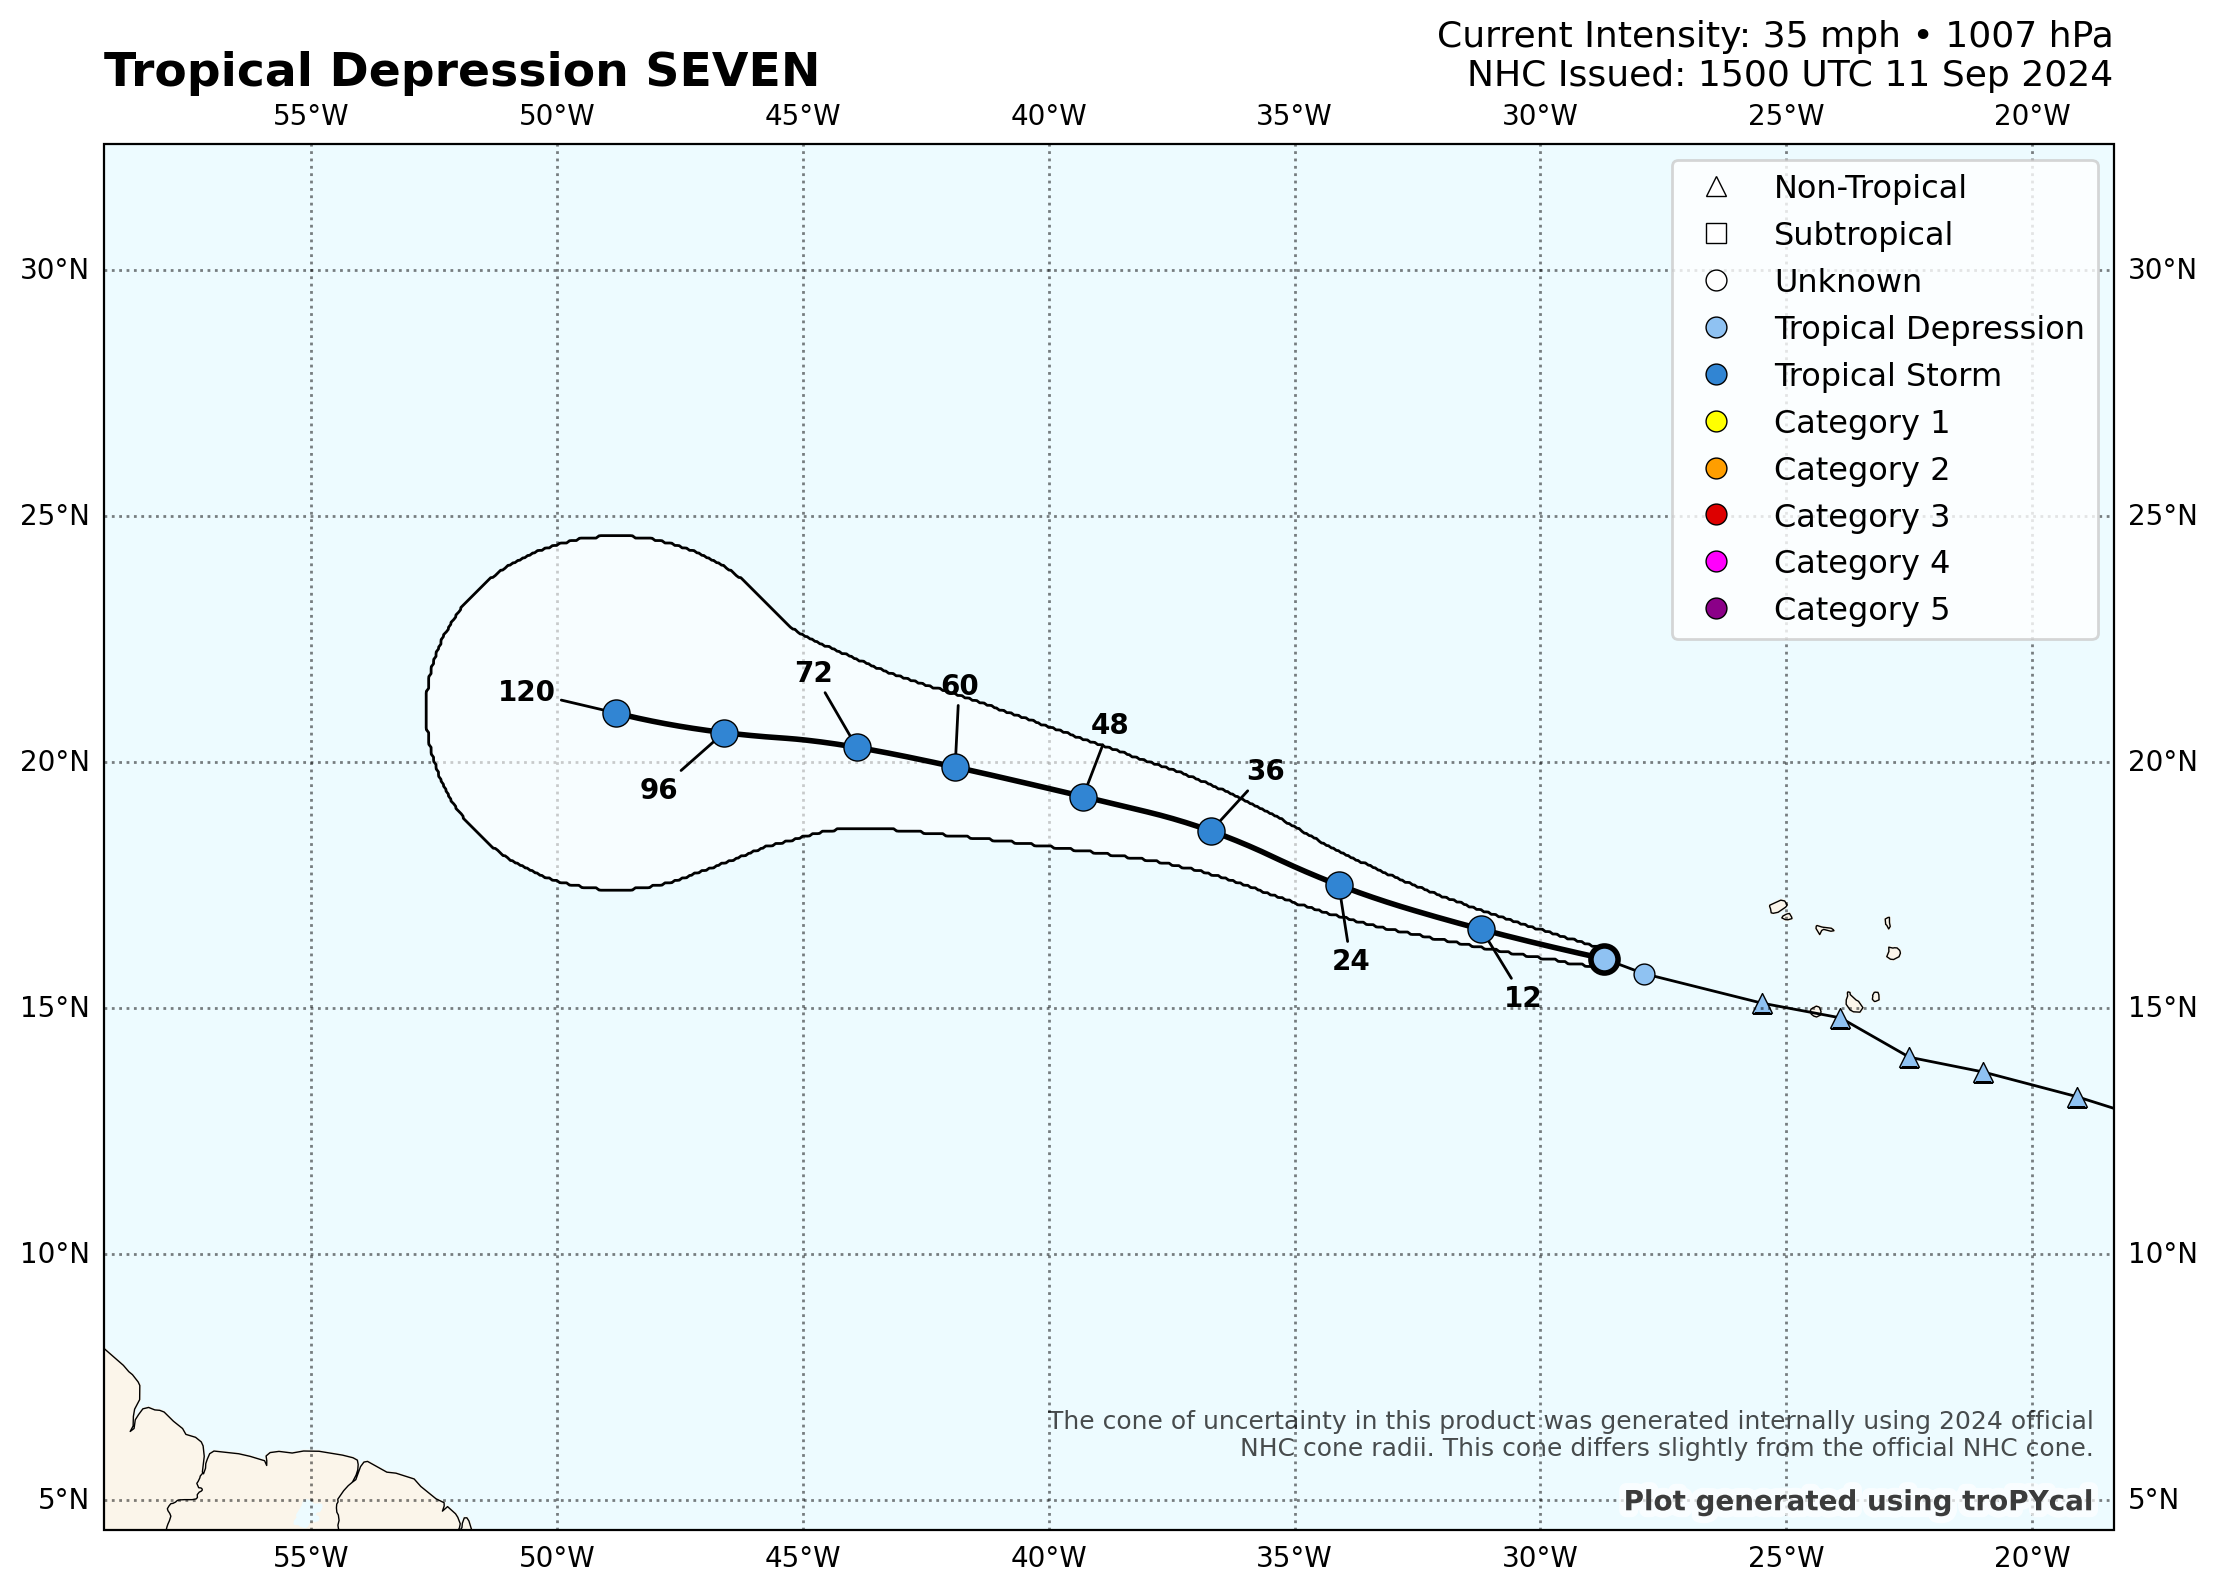

In [21]:
storm.plot_forecast_realtime()

Storm forecast discussions can also be retrieved for storms in NHC's area of responsibility, or the Prognostic Reasoning product for JTWC's area of responsibility.



In [23]:
storm.get_discussion_realtime()

ValueError: invalid literal for int() with base 10: 'Issued'

Lastly, RealtimeStorms also provide the latest available information using the ``get_realtime_info()`` method.

The default argument is ``source='all'``, which returns the latest available data whether from Best Track or NHC Public Advisories. Other possible values are "public_advisory", which only returns the latest public advisory, or "best_track", which only returns the latest best track data.



In [24]:
storm.get_realtime_info()

ValueError: time data '' does not match format '%Y%m%d %I:%M:%S %p UTC'

## Realtime Invests
Invests are essentially RealtimeStorm objects, but without much of the functionality that comes with tropical cyclones (e.g., official forecast track, forecast discussion, etc.). Let's test this out for invest 99L:



In [25]:
invest = realtime_obj.get_storm('AL072024')
invest

<tropycal.realtime.RealtimeStorm>
Storm Summary:
    Maximum Wind:      30 knots
    Minimum Pressure:  1007 hPa
    Start Time:        1200 UTC 11 September 2024
    End Time:          1800 UTC 11 September 2024

Variables:
    time        (datetime) [2024-09-09 18:00:00 .... 2024-09-11 18:00:00]
    extra_obs   (int32) [0 .... 0]
    special     (str) [ .... ]
    type        (str) [DB .... TD]
    lat         (float64) [12.4 .... 16.0]
    lon         (float64) [-16.0 .... -29.6]
    vmax        (int32) [15 .... 30]
    mslp        (int32) [1010 .... 1007]
    wmo_basin   (str) [north_atlantic .... north_atlantic]

More Information:
    id:              AL072024
    operational_id:  AL072024
    name:            SEVEN
    year:            2024
    season:          2024
    basin:           north_atlantic
    source_info:     NHC Hurricane Database
    invest:          False
    source_method:   NHC's Automated Tropical Cyclone Forecasting System (ATCF)
    source_url:      https://f

As we can see above, the ``invest`` attribute of this object is True. For invests in NHC's area of responsibility, we can retrieve NHC's probability of formation which is matched to the closest TWO to the invest within a certain distance of the invest.



In [26]:
invest.get_realtime_formation_prob()

{'prob_2day': 'N/A',
 'risk_2day': 'N/A',
 'prob_7day': 'N/A',
 'risk_7day': 'N/A'}